In [ ]:
"""
# Honor Statement

Name: Zhuoran Wu

E-mail: <zw118@georgetown.edu>

Platform: Windows

In accordance with the class policies and Georgetown's Honor Code,
I certify that, with the exceptions of the class resources and those
items noted below, I have neither given nor received any assistance
on this project.
"""

"\n# Honor Statement\n\nName: Zhuoran Wu\n\nE-mail: <zw118@georgetown.edu>\n\nPlatform: Windows\n\nIn accordance with the class policies and Georgetown's Honor Code,\nI certify that, with the exceptions of the class resources and those\nitems noted below, I have neither given nor received any assistance\non this project.\n"

In [ ]:
import numpy as np
import warnings
import matplotlib.pyplot as plt

from matplotlib import ticker
from math import cos, sin, atan

%matplotlib inline
warnings.filterwarnings("ignore")

## 1.1. Plot (draw) a network

In [3]:
class Neuron():
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def draw(self, neuron_radius):
        circle = plt.Circle((self.x, self.y), radius=neuron_radius, fill=False)
        plt.gca().add_patch(circle)


class Layer():
    def __init__(self, network, number_of_neurons, number_of_neurons_in_widest_layer):
        self.vertical_distance_between_layers = 6
        self.horizontal_distance_between_neurons = 2
        self.neuron_radius = 0.5
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.previous_layer = self.__get_previous_layer(network)
        self.y = self.__calculate_layer_y_position()
        self.neurons = self.__intialise_neurons(number_of_neurons)

    def __intialise_neurons(self, number_of_neurons):
        neurons = []
        x = self.__calculate_left_margin_so_layer_is_centered(number_of_neurons)
        for iteration in range(number_of_neurons):
            neuron = Neuron(x, self.y)
            neurons.append(neuron)
            x += self.horizontal_distance_between_neurons
        return neurons

    def __calculate_left_margin_so_layer_is_centered(self, number_of_neurons):
        return self.horizontal_distance_between_neurons * (self.number_of_neurons_in_widest_layer - number_of_neurons) / 2

    def __calculate_layer_y_position(self):
        if self.previous_layer:
            return self.previous_layer.y + self.vertical_distance_between_layers
        else:
            return 0

    def __get_previous_layer(self, network):
        if len(network.layers) > 0:
            return network.layers[-1]
        else:
            return None

    def __line_between_two_neurons(self, neuron1, neuron2):
        angle = atan((neuron2.x - neuron1.x) / float(neuron2.y - neuron1.y))
        x_adjustment = self.neuron_radius * sin(angle)
        y_adjustment = self.neuron_radius * cos(angle)
        line = plt.Line2D((neuron1.x - x_adjustment, neuron2.x + x_adjustment), (neuron1.y - y_adjustment, neuron2.y + y_adjustment))
        plt.gca().add_line(line)

    def draw(self, layerType=0):
        for neuron in self.neurons:
            neuron.draw( self.neuron_radius )
            if self.previous_layer:
                for previous_layer_neuron in self.previous_layer.neurons:
                    self.__line_between_two_neurons(neuron, previous_layer_neuron)
        # write Text
        x_text = self.number_of_neurons_in_widest_layer * self.horizontal_distance_between_neurons
        if layerType == 0:
            plt.text(x_text, self.y, 'Input Layer', fontsize = 12)
        elif layerType == -1:
            plt.text(x_text, self.y, 'Output Layer', fontsize = 12)
        else:
            plt.text(x_text, self.y, 'Hidden Layer '+str(layerType), fontsize = 12)

            
class NeuralNetwork():
    def __init__(self, number_of_neurons_in_widest_layer):
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.layers = []
        self.layertype = 0

    def add_layer(self, number_of_neurons ):
        layer = Layer(self, number_of_neurons, self.number_of_neurons_in_widest_layer)
        self.layers.append(layer)

    def draw(self):
        plt.figure()
        for i in range( len(self.layers) ):
            layer = self.layers[i]
            if i == len(self.layers)-1:
                i = -1
            layer.draw( i )
        plt.axis('scaled')
        plt.axis('off')
        plt.title( 'Neural Network architecture', fontsize=15 )
        plt.show()

        
class DrawNN():
    def __init__( self, neural_network ):
        self.neural_network = neural_network

    def draw( self ):
        widest_layer = max( self.neural_network )
        network = NeuralNetwork( widest_layer )
        for l in self.neural_network:
            network.add_layer(l)
        network.draw()

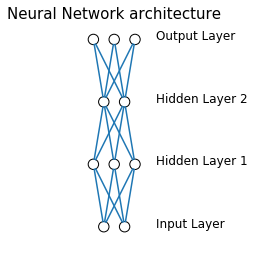

In [4]:
network = DrawNN( [2,3,2,3] )
network.draw()

## 1.2. Write out the mathematical equation for this network

## 1.3. Write out the function in python, call it ff_nn_2_ReLu(...)

In [5]:
# ReLu Function
relu = np.vectorize(lambda z: np.fmax(0,z))

# Softmax Function
def softmax(X, theta = 1.0, axis = None):
    """
    Compute the softmax of each element along an axis of X.

    Parameters
    ----------
    X: ND-Array. Probably should be floats. 
    theta (optional): float parameter, used as a multiplier
        prior to exponentiation. Default = 1.0
    axis (optional): axis to compute values along. Default is the 
        first non-singleton axis.

    Returns an array the same size as X. The result will sum to 1
    along the specified axis.
    """

    # make X at least 2d
    y = np.atleast_2d(X)

    # find axis
    if axis is None:
        axis = next(j[0] for j in enumerate(y.shape) if j[1] > 1)

    # multiply y against the theta parameter, 
    y = y * float(theta)

    # subtract the max for numerical stability
    y = y - np.expand_dims(np.max(y, axis = axis), axis)
    
    # exponentiate y
    y = np.exp(y)

    # take the sum along the specified axis
    ax_sum = np.expand_dims(np.sum(y, axis = axis), axis)

    # finally: divide elementwise
    p = y / ax_sum

    # flatten if X was 1D
    if len(X.shape) == 1: p = p.flatten()

    return p


def ff_nn_2_ReLu(x, W1, W2, b1, b2, V, c):
    a1 = x.dot(W1) + b1
    h1 = relu(a1)
    a2 = h1.dot(W2) + b2
    h2 = relu(a2)
    a3 = h2.dot(V) + c
    out = np.round(softmax(a3), 2)
    return out

W1 = np.array([[1., 0], [-1., 0], [0, 0.5]]).T
W2 = np.array([[1., 0, 0], [-1., -1., 0]]).T
b1 = np.array([0, 0, 1.])
b2 = np.array([1., -1.])
V = np.array([[1., 1.], [0, 0], [-1., -1.]]).T
c = np.array([1., 0, 0])

X = np.array([[1.,0,0], [-1., -1., 1.]]).T

print("""
X:\n{X}
W1:\n{W1}
W2:\n{W2}
b1:\n{b1}
b2:\n{b2}
V:\n{V} 
c:\n{c}\n\n
""".format(X = X, W1 = W1, W2 = W2, b1 = b1, b2 = b2, V = V,c = c))

ff_nn_2_ReLu(X, W1, W2, b1, b2, V, c)


X:
[[ 1. -1.]
 [ 0. -1.]
 [ 0.  1.]]
W1:
[[ 1.  -1.   0. ]
 [ 0.   0.   0.5]]
W2:
[[ 1. -1.]
 [ 0. -1.]
 [ 0.  0.]]
b1:
[0. 0. 1.]
b2:
[ 1. -1.]
V:
[[ 1.  0. -1.]
 [ 1.  0. -1.]] 
c:
[1. 0. 0.]





array([[0.58, 0.33, 0.16],
       [0.21, 0.33, 0.42],
       [0.21, 0.33, 0.42]])

## 1.4. what are the class probabilities associated with the forward pass of each sample?

Suppose that we have the 3 class with 0, 1, 2.

Class 0 for Input [1, -1] with probability 0.58.

Class 2 for Input [0, -1] with probability 0.42.

Class 2 for Input [0 ,1] with probability 0.42.

## 2.1. What are the partial derivatives of f with respect to x and to y?

## 2.2. Create a visualization of the contours of the Rosenbrock function.

## 2.3. Write a Gradient Descent algorithm for finding the minimum of the function. Visualize your results with a few different learning rates.

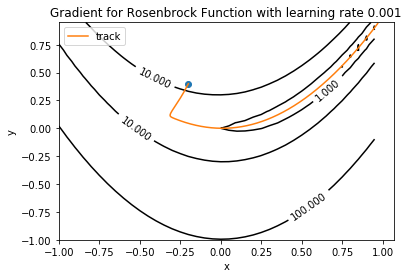

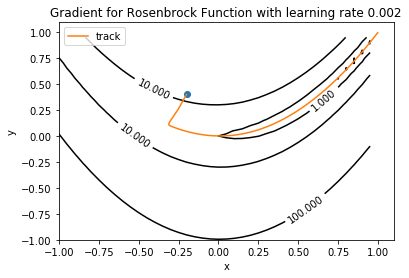

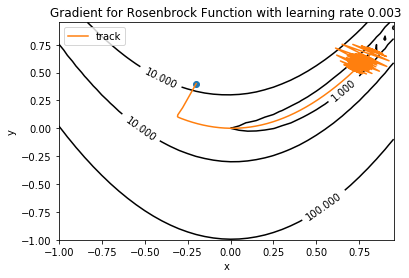

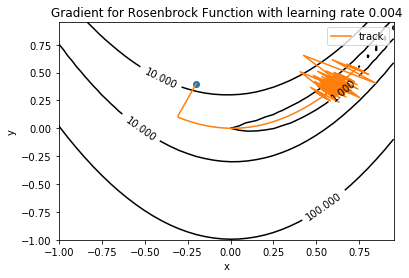

In [6]:
# Gra

def f(x, y):
    return (1 - x) ** 2 + 100 * (y - x * x) ** 2


def grad_f(x, y):
    return np.matrix([[2 * x - 2 + 400 * x * (x * x - y)],
                      [200 * (y - x * x)]])


def delta_grad(x, y, learning_rate):
    g = grad_f(x, y)
    delta = learning_rate * g
    return delta


def grad_descent(x, iterations, learning_rate, xv, yv):
    for t in range(iterations):
        delta = delta_grad(x[0, 0], x[1, 0], learning_rate)
        # if abs(delta[0, 0]) < 0.00001 and abs(delta[1, 0]) < 0.00001:
        #     break
        x = x - delta
        xv.append(x[0, 0])
        yv.append(x[1, 0])

        
def draw_graph(iterations, learning_rate):
    delta = 0.05
    x = np.arange(-1.0, 1.0, delta)
    y = np.arange(-1.0, 1.0, delta)
    X, Y = np.meshgrid(x, y)

    plt.figure()
    plt.contourf(X, Y, f(X, Y), 5, alpha=0, cmap=plt.cm.hot)
    C = plt.contour(X, Y, f(X, Y), 8, locator=ticker.LogLocator(), colors='black', linewidth=0.01)
    plt.clabel(C, inline=True, fontsize=10)

    x = np.matrix([[-0.2], [0.4]])
    xv = [x[0, 0]]
    yv = [x[1, 0]]
    plt.plot(x[0, 0], x[1, 0], marker='o')

    grad_descent(x, iterations, learning_rate, xv, yv)
    plt.plot(xv, yv, label='track')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Gradient for Rosenbrock Function with learning rate {lr}'.format(lr = learning_rate))
    plt.legend()
    plt.show()

    
draw_graph(6000, 0.001)
draw_graph(6000, 0.002)
draw_graph(6000, 0.003)
draw_graph(6000, 0.004)

In [25]:
# GD

def draw_graph_2(iterations, learning_rate):

    x = np.linspace(-1.2, 1.2, 100)
    y = np.linspace(-1.2, 1.2, 100)
    X, Y = np.meshgrid(x, y)
    levels = [0.1,1,2,4,9, 16, 25, 36, 49, 64, 81, 100]
    Z = x**2 + 100*Y**2
    c = plt.contour(X, Y, Z, levels)

    x = np.matrix([[-1], [-1]])
    xv = [x[0, 0]]
    yv = [x[1, 0]]
    plt.plot(x[0, 0], x[1, 0], marker='o')

    grad_descent(x, iterations, learning_rate, xv, yv)
    plt.plot(xv, yv, label='track')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Gradient for Rosenbrock Function with learning rate {lr}'.format(lr = learning_rate))
    plt.legend()
    plt.show()

    
# draw_graph_2(6000, 0.01)
# draw_graph_2(6000, 0.002)
# draw_graph_2(6000, 0.003)
# draw_graph_2(6000, 0.004)

## 2.4. Write a Gradient Descent With Momentum algorithm for finding the minimum. Visualize your results with a few different settings of the algorithm’s hyperparameters.

Text(0.5,1,'Gradieent descent with momentum')

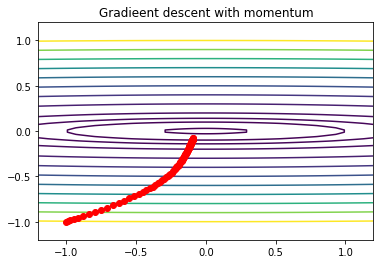

In [8]:
# GD with Momentum

def f2(x):
    return (1 - x[0]) ** 2 + 100 * (x[1] - x[0] * x[0]) ** 2

def grad2(x):
    return np.array([2 * x[0] - 2 + 400 * x[0] * (x[0] * x[0] - x[1]), 200 * (x[1] - x[0] * x[0])])

def gd2(x, grad, alpha, max_iter=10):
    xs = np.zeros((1 + max_iter, x.shape[0]))
    xs[0,:] = x
    for i in range(max_iter):
        x = x - alpha * grad(x)
        xs[i+1,:] = x
    return xs

def gd2_momentum(x, grad, alpha, beta=0.9, max_iter=10):
    xs = np.zeros((1 + max_iter, x.shape[0]))
    xs[0, :] = x
    v = 0
    for i in range(max_iter):
        v = beta*v + (1-beta)*grad(x)
        vc = v/(1+beta**(i+1))
        x = x - alpha * vc
        xs[i+1, :] = x
    return xs


alpha = 0.0001
x0 = np.array([-1,-1])
xs = gd2_momentum(x0, grad2, alpha, beta=0.8, max_iter=100)

x = np.linspace(-1.2, 1.2, 100)
y = np.linspace(-1.2, 1.2, 100)
X, Y = np.meshgrid(x, y)
levels = [0.1,1,2,4,9, 16, 25, 36, 49, 64, 81, 100]
Z = x**2 + 100*Y**2
c = plt.contour(X, Y, Z, levels)
plt.plot(xs[:, 0], xs[:, 1], 'o-', c='red')
plt.title('Gradieent descent with momentum')

## 3.1. For the same network as in Number 1, derive expressions of the gradient of the Loss function with respect to each of the model parameters.

## 3.2. Write a function grad f(...) that takes in a weights vector and returns the gradient of the Loss at that location.

Text(0.5,0,'X')

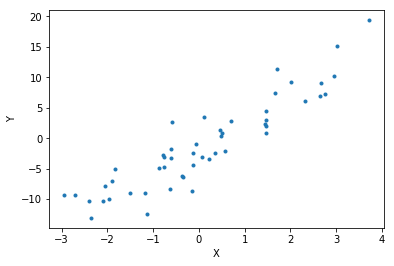

In [9]:
# Backprop

# Generating the random data

x = 2 * np.random.randn(50)
y = 4 * x - 2 + 3 * np.random.randn(len(x))

plt.plot(x,y, '.')
plt.ylabel("Y")
plt.xlabel("X")

In [10]:
X = np.transpose(np.array([np.ones(len(x)), x]))

np.matmul(np.matmul(np.linalg.inv( np.matmul(np.transpose(X) , X)), np.transpose(X)), y.reshape(len(x),1))

array([[-1.53765622],
       [ 4.05408846]])

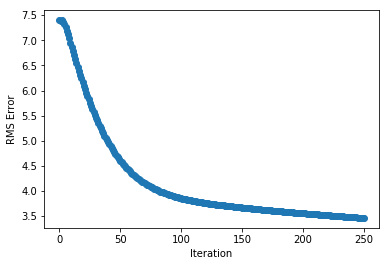

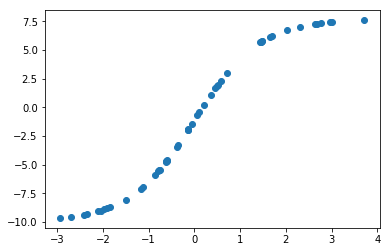

In [11]:
def loss(y, y_hat):
    # Root Mean Squared loss metric
    return np.sqrt(np.average((y-y_hat)**2))

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def yhat(x,y, coeffs):
    # returns model prediction 
    w1, w2, w3, w4, b = coeffs
    return w3*sigmoid(w1*x) + w4*sigmoid(w2*x) + b


def grad_f(vector, x, y):
    """
    Computes local gradient vector for squared-error loss on OLS regression model cofficients
    """
    w1, w2, w3, w4, b = vector
    prediction = yhat(x, y, vector)  
    residuals = (y - prediction)

    dL_dw1 = - np.average(x*residuals* sigmoid_derivative(w1*x))
    dL_dw2 = - np.average(x*residuals* sigmoid_derivative(w2*x))
    dL_dw3 = - np.average(sigmoid(w1*x) * residuals)
    dL_dw4 = - np.average(sigmoid(w2*x) * residuals)
    dL_db = - np.average(residuals)
    
    return np.array([dL_dw1, dL_dw2, dL_dw3, dL_dw4, dL_db])


def grad_descent(x, y, starting_point=None, iterations=10, learning_rate=1e-2):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-.1,.1,size=5).astype("float")
    trajectory = [point]
    losses = [loss(y, yhat(x,y,point))]
    
    for i in range(iterations):
        grad = grad_f(point, x, y)
        point = point - learning_rate * grad
        trajectory.append(point)
        losses.append(loss(y, yhat(x,y,point)))
    return (np.array(trajectory), losses)


traj, losses = grad_descent(x, y, iterations=250,learning_rate=1e-1)

plt.plot(losses,'o')
plt.ylabel("RMS Error")
plt.xlabel("Iteration")
plt.show()

plt.plot(x, yhat(x,y,traj[250]),'o')
plt.show()

## 3.3. Generate a synthetic dataset of 3 equally sampled bivariate Gaussian distributions with parameters

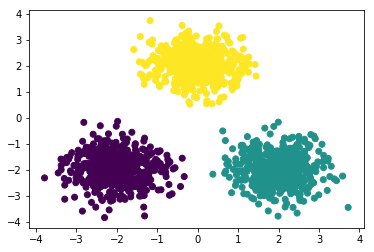

In [21]:
x = np.concatenate(
    (np.random.multivariate_normal(mean=[0,2],cov=[[.33,0],[0,.33]],size = 500),
    np.random.multivariate_normal(mean=[2,-2],cov=[[.33,0],[0,.33]],size = 500)))
x = np.concatenate((x, np.random.multivariate_normal(mean=[-2,-2],cov=[[.34,0],[0,.34]],size = 500)))
y = np.zeros(1500)
y[:500] = 2
y[500:1000] = 1
plt.scatter(x[:,0], x[:,1], c=y)

## 3.4. Fit your network using Gradient Descent. Keep track of the total Loss at each iteration and plot the result.

## 3.5. Repeat the exercise above using Momentum. Comment on whether your algorithm seems to converge more efficiently.